In [ ]:
pip install split-folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


In [ ]:
dir_dummy = '/content/drive/MyDrive/Dataset'

In [ ]:
splitfolders.ratio(
    dir_dummy,
    output='dataset_splitted',
    ratio=(.7, 0.1, 0.2)
)

Copying files: 12000 files [15:06, 13.24 files/s]


In [ ]:
split_train = '/content/drive/MyDrive/Dataset/dataset_splitted/train'
split_val = '/content/drive/MyDrive/Dataset/dataset_splitted/val'
split_test = '/content/drive/MyDrive/Dataset/dataset_splitted/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=25,
                    brightness_range=(0.5,1.0),
                    shear_range=0.2,
                    zoom_range=(0.8,1.0),
                    fill_mode='nearest',
                    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    split_train,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    split_val,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    split_test,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 8400 images belonging to 24 classes.
Found 1200 images belonging to 24 classes.
Found 2400 images belonging to 24 classes.


In [ ]:
image, label = train_generator.next()

In [ ]:
class_name = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

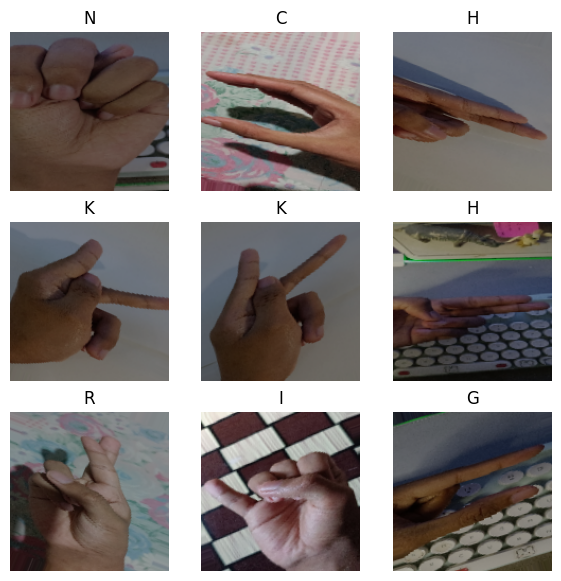

In [ ]:
plt.figure(figsize=(7,7))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i])
  plt.title(class_name[np.argmax(label[i])])
  plt.axis("off")

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience = 2,
    verbose=1,
    factor=0.3,
    min_lr=0.000001
)

In [ ]:
from tensorflow import keras
from keras.callbacks import EarlyStopping
monitor_val_accuracy = EarlyStopping(monitor='val_accuracy', patience=2)

In [ ]:
model = tf.keras.models.Sequential([
    #input layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    # Hidden Layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # Hidden Layer
    tf.keras.layers.Dense(24, activation='softmax') # output Layer
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 35, 35, 64)       

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[monitor_val_accuracy, reduce_lr],
)

Epoch 1/5
263/263 [==============================] - 2434s 9s/step - loss: 2.0335 - accuracy: 0.4090 - val_loss: 0.7301 - val_accuracy: 0.7400 - lr: 1.0000e-04
Epoch 2/5
263/263 [==============================] - 2804s 11s/step - loss: 0.6527 - accuracy: 0.8127 - val_loss: 0.2826 - val_accuracy: 0.9200 - lr: 1.0000e-04
Epoch 3/5
263/263 [==============================] - 2788s 11s/step - loss: 0.4267 - accuracy: 0.8835 - val_loss: 0.2548 - val_accuracy: 0.9217 - lr: 1.0000e-04
Epoch 4/5
263/263 [==============================] - 2782s 11s/step - loss: 0.3323 - accuracy: 0.9108 - val_loss: 0.2144 - val_accuracy: 0.9208 - lr: 1.0000e-04
Epoch 5/5
263/263 [==============================] - 2781s 11s/step - loss: 0.2664 - accuracy: 0.9256 - val_loss: 0.1527 - val_accuracy: 0.9558 - lr: 1.0000e-04


In [ ]:
%cd /content/drive/MyDrive/Skripsi

/content/drive/MyDrive/Skripsi


In [ ]:
model.save("Model2.h5")

In [ ]:
test_evaluate = model.evaluate(test_generator)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}')

75/75 [==============================] - 1464s 20s/step - loss: 0.2052 - accuracy: 0.9521
Test loss     : 0.20523546636104584
Test accuracy : 0.95


In [ ]:
import pickle

with open('trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)